In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install scipy

In [2]:
import pandas as pd
import numpy as np
# load data
# what I make the names here doesn't matter
data = pd.read_csv(
    "data.csv",
    header=None,
)

df = data.unstack().reset_index()
df.columns = list("XYZ")

print(df)

      X  Y     Z
0     0  0  0.68
1     0  1  0.57
2     0  2  0.44
3     0  3  0.36
4     0  4  0.33
..   .. ..   ...
115  11  5  5.67
116  11  6  5.62
117  11  7  5.53
118  11  8  5.48
119  11  9  5.45

[120 rows x 3 columns]


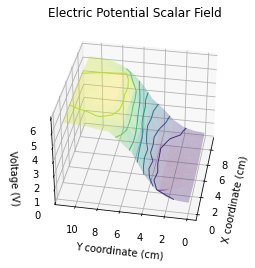

In [68]:
#%matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# equipotential contour lines
def only_contours(): 
    ax.contour3D(
        np.arange(10), 
        np.arange(12), 
        df['Z'].to_numpy().reshape(12,10),
        cmap='viridis',
        linewidths=1,
    )
    ax.view_init(35, 190)

def only_trisurf():
    ax.plot_trisurf(
        df['Y'], 
        df['X'], 
        df['Z'], 
        cmap='viridis', 
        linewidth=0.1,
    )
    ax.view_init(35, 190)

    
def both_graphs():
    ax.plot_trisurf(
        df['Y'], 
        df['X'], 
        df['Z'], 
        cmap='viridis', 
        linewidth=0.1,
        alpha=0.3,
    )
    ax.contour3D(
        np.arange(10), 
        np.arange(12), 
        df['Z'].to_numpy().reshape(12,10),
        cmap='viridis',
        linewidths=1,
    )
    ax.view_init(35, 190)

plt.title('Electric Potential Scalar Field')
ax.set_xlabel('X coordinate (cm)')
ax.set_ylabel('Y coordinate (cm)')
ax.set_zlabel('Voltage (V)')

#only_contours()
#only_trisurf()
both_graphs()